<a href="https://colab.research.google.com/github/kahrvba/-LSTM-Code-for-a-Prediction-Problem/blob/main/Phyton%20Tensorflow%20Keras%20LSTM%20Code%20for%20a%20Prediction%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# Generate a sample sine wave time series
t = np.linspace(0, 10, 500)
series = 5 * np.sin(0.2 * t) + 0.4 * t

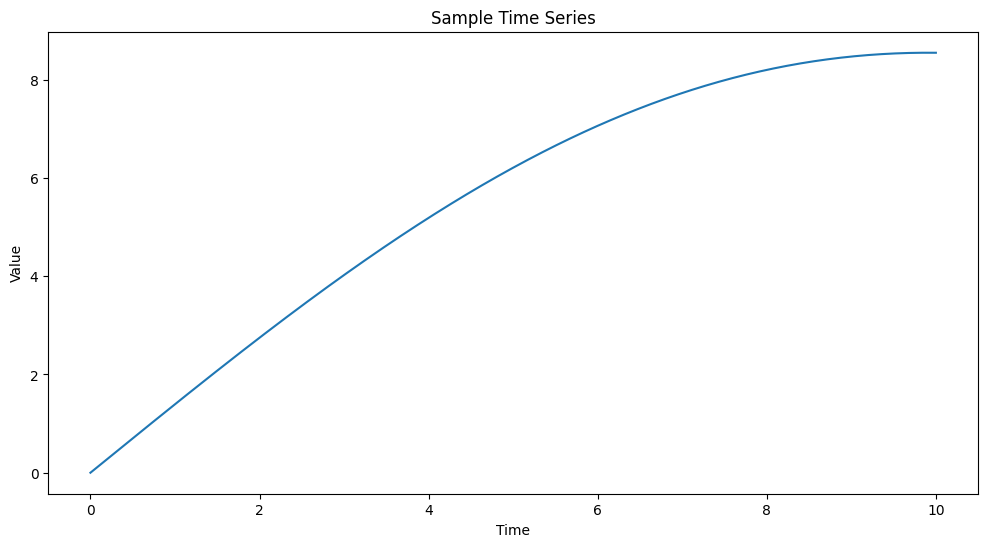

In [3]:
# Plot the sample time series
plt.figure(figsize=(12, 6))
plt.plot(t, series)
plt.title("Sample Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [4]:
# Normalize the data\n
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series.reshape(-1, 1))

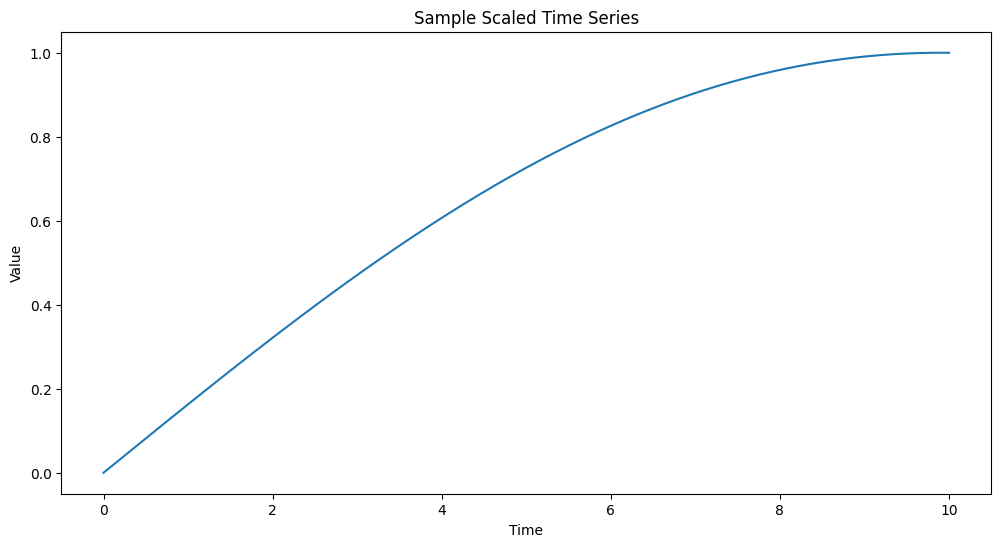

In [5]:
# Plot the sample time series
plt.figure(figsize=(12, 6))
plt.plot(t, scaled_series)
plt.title("Sample Scaled Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [7]:
 #Create sequences and labels for time series prediction\n",
sequence_length = 10
X,y = [], []
for i in range(len(scaled_series) - sequence_length):
    X.append(scaled_series[i:i + sequence_length])
    y.append(scaled_series[i + sequence_length])
X, y = np.array(X), np.array(y)
print (y)

[[0.03281866]
 [0.03609907]
 [0.03937907]
 [0.04265862]
 [0.04593768]
 [0.04921622]
 [0.05249418]
 [0.05577155]
 [0.05904828]
 [0.06232433]
 [0.06559966]
 [0.06887424]
 [0.07214803]
 [0.075421  ]
 [0.0786931 ]
 [0.08196429]
 [0.08523455]
 [0.08850383]
 [0.09177209]
 [0.09503931]
 [0.09830543]
 [0.10157042]
 [0.10483425]
 [0.10809688]
 [0.11135827]
 [0.11461838]
 [0.11787718]
 [0.12113463]
 [0.12439069]
 [0.12764532]
 [0.13089849]
 [0.13415016]
 [0.13740029]
 [0.14064885]
 [0.14389579]
 [0.14714109]
 [0.1503847 ]
 [0.15362659]
 [0.15686672]
 [0.16010506]
 [0.16334155]
 [0.16657618]
 [0.1698089 ]
 [0.17303968]
 [0.17626847]
 [0.17949525]
 [0.18271997]
 [0.1859426 ]
 [0.18916311]
 [0.19238144]
 [0.19559758]
 [0.19881148]
 [0.2020231 ]
 [0.20523241]
 [0.20843938]
 [0.21164396]
 [0.21484611]
 [0.21804582]
 [0.22124303]
 [0.2244377 ]
 [0.22762982]
 [0.23081933]
 [0.2340062 ]
 [0.2371904 ]
 [0.24037189]
 [0.24355063]
 [0.24672659]
 [0.24989973]
 [0.25307002]
 [0.25623741]
 [0.25940188]
 [0.26

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Build and train your LSTM model\n",
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1) )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
learning_rate=0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=64)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1978
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0306
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0107
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.9966e-04
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0367e-04
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8787e-04
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.5401e-04
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.6212e-04
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2493e-04
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6538e-04
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7157e-04 
Ep

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


Text(0, 0.5, 'Value')

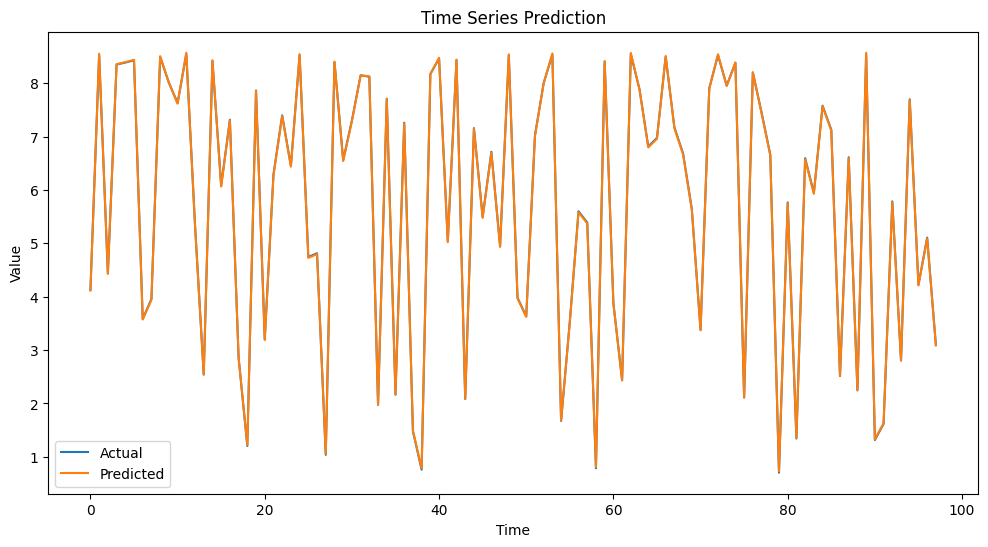

In [11]:
# Make predictions and evaluate your model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Time Series Prediction")
plt.xlabel("Time")
plt.ylabel("Value")